In [1]:
import requests
from time import sleep
import random

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.cluster.vq import whiten, kmeans2

In [2]:
# Функция запросов к футбольному API
def call_football(api_url):
    token = {'X-Auth-Token': '7eecbfb6d62b4e5dbd91a81d316b8cc3'}
    return requests.get(api_url, headers = token).json()

In [3]:
# Получаем нужные данные с api.football-data.org
def get_football_data(season):
    api_url = 'http://api.football-data.org/v1/competitions/{}/leagueTable'.format(season)
    standings = call_football(api_url)
    football_data = []
    for standing in standings['standing']:
        team_data = call_football(standing['_links']['team']['href'])
        squad_market_value = team_data['squadMarketValue'] if team_data['squadMarketValue']\
            else random.randint(10000000, 100000000)
        football_data.append({'squadMarketValue': squad_market_value, 'losses': standing['losses']})
        sleep(0.1)
    return football_data

In [4]:
season = '459'
football_data = get_football_data(season)

In [5]:
football_data

[{'losses': 5, 'squadMarketValue': 79265608},
 {'losses': 12, 'squadMarketValue': 50276148},
 {'losses': 8, 'squadMarketValue': 87913422},
 {'losses': 7, 'squadMarketValue': 59143958},
 {'losses': 9, 'squadMarketValue': 69857692},
 {'losses': 11, 'squadMarketValue': 13335640},
 {'losses': 12, 'squadMarketValue': 95218125},
 {'losses': 14, 'squadMarketValue': 40387816},
 {'losses': 16, 'squadMarketValue': 91000762},
 {'losses': 15, 'squadMarketValue': 22404175},
 {'losses': 14, 'squadMarketValue': 47427200},
 {'losses': 13, 'squadMarketValue': 32430307},
 {'losses': 14, 'squadMarketValue': 84319226},
 {'losses': 12, 'squadMarketValue': 37794592},
 {'losses': 16, 'squadMarketValue': 31925962},
 {'losses': 16, 'squadMarketValue': 77441839},
 {'losses': 16, 'squadMarketValue': 88759824},
 {'losses': 18, 'squadMarketValue': 95753056},
 {'losses': 18, 'squadMarketValue': 18951094},
 {'losses': 18, 'squadMarketValue': 80662183},
 {'losses': 20, 'squadMarketValue': 20838642},
 {'losses': 19, '

In [6]:
football_data = pd.DataFrame(football_data)
football_data

,losses,squadMarketValue
0,5,79265608
1,12,50276148
2,8,87913422
3,7,59143958
4,9,69857692
5,11,13335640
6,12,95218125
7,14,40387816
8,16,91000762
9,15,22404175


In [7]:
normalized_football_data = whiten(football_data.as_matrix())
normalized_football_data

array([[1.27588232, 2.82901242],
       [3.06211756, 1.79437023],
       [2.04141171, 3.1376554 ],
       [1.78623525, 2.11086493],
       [2.29658817, 2.49324118],
       [2.8069411 , 0.47595284],
       [3.06211756, 3.39836235],
       [3.57247049, 1.44145281],
       [4.08282342, 3.24784345],
       [3.82764695, 0.79961147],
       [3.57247049, 1.69269045],
       [3.31729403, 1.15744701],
       [3.57247049, 3.0093775 ],
       [3.06211756, 1.34889989],
       [4.08282342, 1.1394468 ],
       [4.08282342, 2.76392158],
       [4.08282342, 3.16786373],
       [4.59317634, 3.4174542 ],
       [4.59317634, 0.67637001],
       [4.59317634, 2.87885658],
       [5.10352927, 0.74373715],
       [4.84835281, 0.94827369]])

In [8]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}

In [9]:
centroids, cluster_map = kmeans2(normalized_football_data, 3)
colors = [colors_map[c] for c in cluster_map]
centroids, cluster_map

(array([[1.85002936, 2.64269348],
        [4.00991586, 3.12623991],
        [3.80444909, 1.11075021]]),
 array([0, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2]))

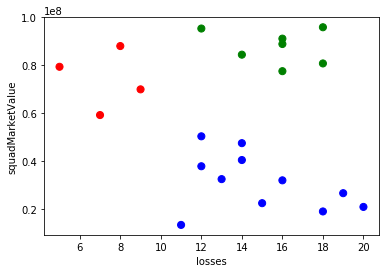

In [10]:
football_data.plot.scatter(x='losses', y='squadMarketValue', c=colors, s=50)

In [11]:
centroids, cluster_map = kmeans2(normalized_football_data, 5)
colors = [colors_map[c] for c in cluster_map]
centroids, cluster_map

(array([[4.49110576, 0.86148782],
        [1.85002936, 2.64269348],
        [4.59317634, 3.14815539],
        [3.23223521, 1.31846887],
        [3.77661166, 3.11747372]]),
 array([1, 3, 1, 1, 1, 3, 4, 3, 4, 0, 3, 3, 4, 3, 0, 4, 4, 2, 0, 2, 0, 0]))

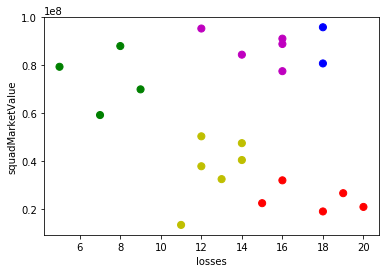

In [12]:
football_data.plot.scatter(x='losses', y='squadMarketValue', c=colors, s=50)